Welcome to today's lab!  

The main priority today will be to introduce ourselves to the SciKit learn API and fit a decision tree on a dataset and understand its main points.  

Today's lab will lay a foundation for working with more sophisticated models that represent the edge of machine learning.

**Step 1:**  Load in the file `housing.csv`

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/Users/mcs275/dat-class-repo/Homework/Unit2/data/housing.csv')

**Step 2:** Declare `X` & `y`

`y` is the `PRICE` column, and `X` is every numeric column except `PRICE`.

In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [6]:
#all variables/features
X = df.iloc[:, :-1]
##predict price
y = df['PRICE']
##supervised b/c we know the Y we are solving for
##unsupervised there is no y, only X

**Step 3:** Initialize a `DecisionTreeRegressor` with a `max_depth` of 3, and fit it on `X` and `y`

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
#initiate your algo
tree = DecisionTreeRegressor(max_depth = 3)

In [9]:
##take algo and make it learn patterns in your data using the fit method
tree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

**Step 4:** Call `plot_tree` to visualize the results

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

**Step 5:** Call the `predict` method on your original dataset.  Look at the results, and make sure you can make sense out of them/

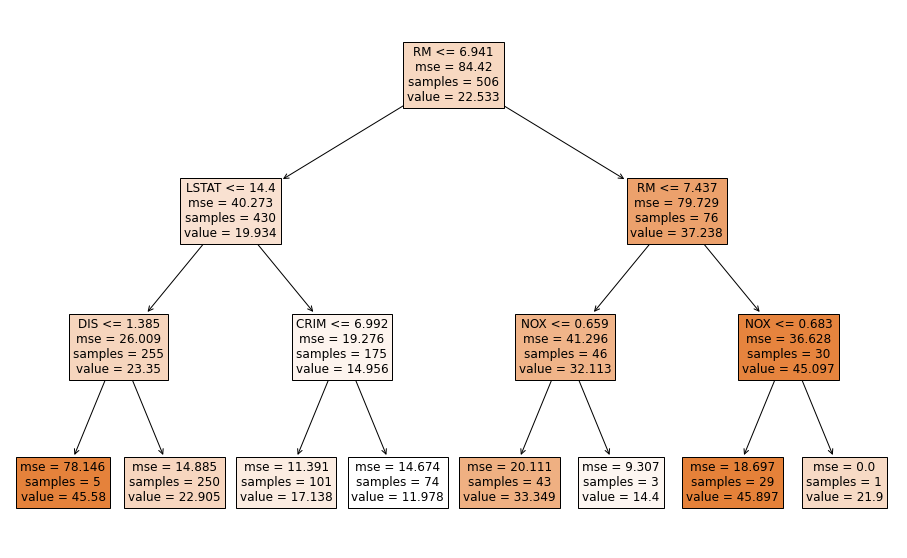

In [11]:
plt.figure(figsize = (16, 10)) ##empty chart

plot_tree(tree, filled = True, fontsize = 12, feature_names = X.columns);

In [ ]:
#first value at each node, tells you which data point was used to make the split becuase that gave the decision tree
#the biggest increase in predictive accurace
#mse = mean square error
#takes everything on that leaf and takes the avg value and uses that to calculate the error


In [12]:
df['prediction'] = tree.predict(X)

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,prediction
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,22.905200
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.905200
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.348837
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.348837
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,33.348837


In [17]:
y.mean() ##this is the value in the top node of the tree

22.532806324110698

In [18]:
#arrange model parameters to minimize the loss function (mse in this example)

In [20]:
y- y.mean()
#calcuate the error

0       1.467194
1      -0.932806
2      12.167194
3      10.867194
4      13.667194
         ...    
501    -0.132806
502    -1.932806
503     1.367194
504    -0.532806
505   -10.632806
Name: PRICE, Length: 506, dtype: float64

In [44]:
root_mse = np.mean((y - y.mean())**2)

In [24]:
df['CHAS'].unique()

array([0, 1])

In [28]:
left_side = df[df['CHAS'] == 1]
right_side = df[df['CHAS'] != 1]

In [30]:
#calculate the avg value of y on teh left and the right hand side
y[left_side.index].mean()

28.44

In [31]:
y[right_side.index].mean()

22.093842887473482

In [33]:
left_mse = np.mean((y[left_side.index].mean() - y[left_side.index])**2)

In [34]:
right_mse = np.mean((y[right_side.index].mean() - y[right_side.index])**2)

In [35]:
right_mse  ## more accurate than overall mse of 84.4

77.82737185641962

In [36]:
left_mse ##less accurate compared to overall mse of 84.4

135.64354285714285

In [38]:
left_weight = left_side.shape[0] / y.shape[0]

In [39]:
right_weight = right_side.shape[0] / y.shape[0]

In [40]:
left_weight

0.0691699604743083

In [41]:
right_weight

0.9308300395256917

In [42]:
#calculate the mse after the split by taking the weighted mse by portion of samples on each side

In [43]:
(left_weight * left_mse) + (right_weight * right_mse)

81.82651411931549

In [45]:
root_mse - ((left_weight * left_mse) + (right_weight * right_mse))

2.5930420368501075

In [46]:
##the mse would improve from 84.42 to 81.82
##the info gain is 2.59 used by decision tree to figure out what point to cut on -- increase in mse is the point of the decision tree

In [47]:
## you have error at the parent node and error at the child node and you want to max the difference between the two

In [49]:
##Trying it by splitting on the RM<= 6.941
left_side = df[df['RM'] <= 6.941]
right_side = df[df['RM'] >6.941]
root_mse = np.mean((y - y.mean())**2)
left_mse = np.mean((y[left_side.index].mean() - y[left_side.index])**2)
right_mse = np.mean((y[right_side.index].mean() - y[right_side.index])**2)
left_weight = left_side.shape[0] / y.shape[0]
right_weight = right_side.shape[0] / y.shape[0]
root_mse - ((left_weight * left_mse) + (right_weight * right_mse))

38.220464479057114

**Step 6:** call the `score` method on your model, and pass in `X` and `y` as arguments.  We'll talk about the results of this after the lab

In [50]:
tree.score(X, y)

0.8177924678036443

**Step 7:** Try changing the following parameters to see what they do.  It might help to draw the tree after you are done fitting to see what has changed.  If you want some guidance you can look at the source page for the scikit-learn decision tree:  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

 - `max_depth`: positive integer.  Set it to `None` if you want the tree to split indefinitely
 - `max_features`: can be a fraction (between 0 and 1) or an integer
 - `min_samples_leaf`: integer or fraction (between 0 and 1)

In [56]:
tree = DecisionTreeRegressor(max_depth = 2)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=2)

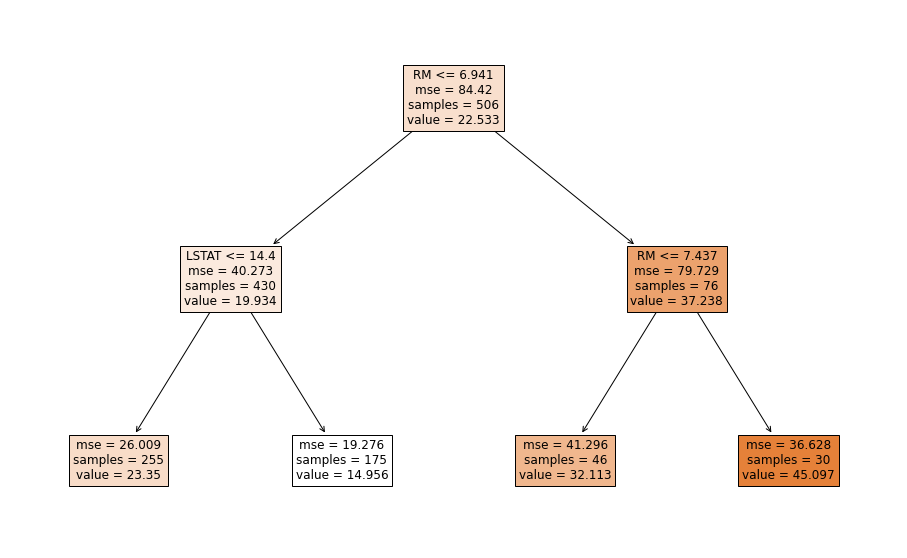

In [57]:
plt.figure(figsize = (16, 10)) ##empty chart

plot_tree(tree, filled = True, fontsize = 12, feature_names = X.columns);

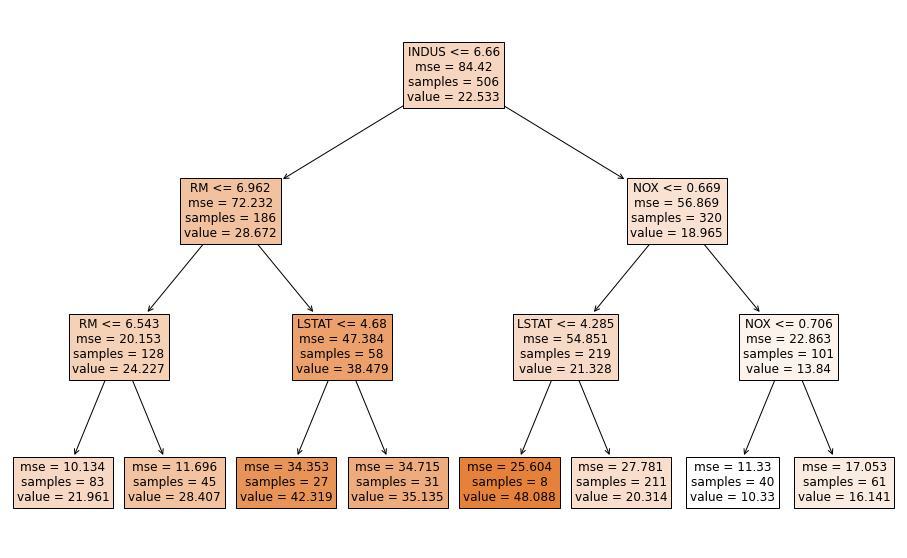

In [64]:
tree = DecisionTreeRegressor(max_depth = 3, max_features = 5)  
##will randomly select from 5 columns at each node, set to decimal and will select % of columns
tree.fit(X, y)
plt.figure(figsize = (16, 10)) ##empty chart
plot_tree(tree, filled = True, fontsize = 12, feature_names = X.columns);

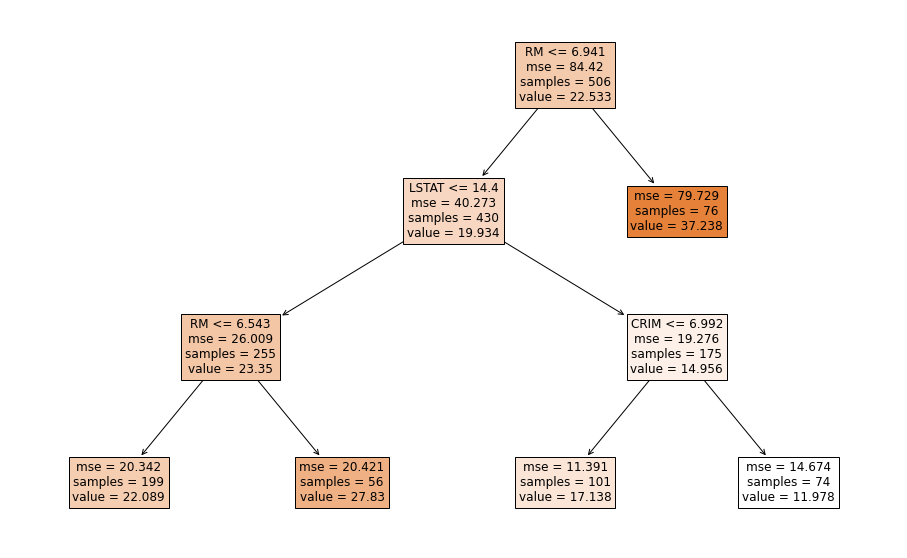

In [63]:
##min samples leaf done with an integer, min # of samples on each leaf
tree = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 50)
tree.fit(X, y)
plt.figure(figsize = (16, 10)) ##empty chart
plot_tree(tree, filled = True, fontsize = 12, feature_names = X.columns);

In [65]:
tree.score(X, y)

0.7440960958353897

In [ ]:
##R squared goodness of fit
#how much of the explained variance can your model account for 

In [73]:
naive_error = np.mean((y - y.mean())**2) #this is the error for the avg value of y

In [70]:
mod_error = np.mean((y-tree.predict(X))**2) #this is the error for the model predictions

In [71]:
#R**2 compares mod error to naive error

In [74]:
naive_error

84.4195561561656

In [75]:
mod_error

21.603294008206312

In [76]:
1 - (mod_error / naive_error) ##how does one error term compare to others

0.7440960958353899

In [77]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 248 kB/s eta 0:00:011
